## В этом ноутбуке вы узнаете про модели которые используются в машинном обучении.

**Scikit-Learn (sklearn)** - это одна из самых популярных и широко используемых библиотек Python для машинного обучения. Она предоставляет простой и эффективный инструментарий для анализа данных и моделирования. Данная библиотека содержит множество готовых моделей которыми мы будем пользоваться.

___
#### k-Nearest Neighbors (k-NN)

**Алгоритм:**
k-Nearest Neighbors (k-NN) – один из самых простых и понятных алгоритмов машинного обучения. Он используется для классификации и регрессии. В k-NN для классификации объекту присваивается класс, наиболее часто встречающийся среди k ближайших к нему объектов. В регрессии - значение, которое является средним среди k ближайших объектов.

**Интуиция:**
Интуиция за k-NN проста: похожие объекты имеют схожие метки. Представьте себе, что вы хотите предсказать, будет ли новый студент успешным в школе, основываясь на его характеристиках, таких как оценки, участие в клубах и посещаемость. Вы можете посмотреть на ближайших студентов с похожими характеристиками и узнать, были ли они успешными. Если большинство из них были успешными, то, скорее всего, и новый студент будет успешным.
Пример с точками разных цветов

Рассмотрим конкретный пример. У нас есть две группы точек на плоскости: красные и синие. Также есть несколько черных точек, для которых мы хотим предсказать их цвет (красный или синий).

Вот визуализация этого примера и использование алгоритма k-NN для предсказания цвета черных точек:

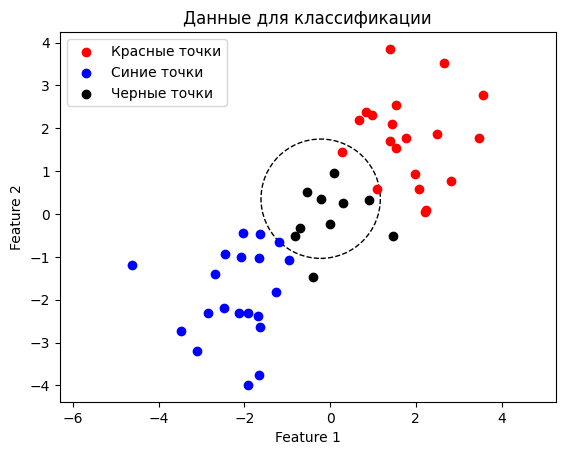

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle


k = 3

# Создаем данные
np.random.seed(42)
red_points = np.random.randn(20, 2) + [2, 2]
blue_points = np.random.randn(20, 2) + [-2, -2]
black_points = np.random.randn(10, 2)

# Создаем метки для данных
red_labels = np.ones(len(red_points))
blue_labels = np.zeros(len(blue_points))

# Объединяем данные и метки
X_train = np.vstack((red_points, blue_points))
y_train = np.hstack((red_labels, blue_labels))

#Для одной из черных точек отобразим окружность радиусом от нее до k-го ближайшего соседа
point = black_points[0]
distances = np.linalg.norm(X_train - point, axis=1)
k_nearest = np.argsort(distances)[:k]
radius = distances[k_nearest[-1]]
plt.gca().add_patch(Circle(point, radius, color='black', fill=False, linestyle='--'))

# Соотношение сторон графика один к одному
plt.axis('equal')

# Визуализируем данные
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Красные точки')
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Синие точки')
plt.scatter(black_points[:, 0], black_points[:, 1], color='black', label='Черные точки')
plt.legend()
plt.title('Данные для классификации')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем и обучаем модель k-NN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Предсказываем значения для черных точек
y_pred = knn.predict(black_points)

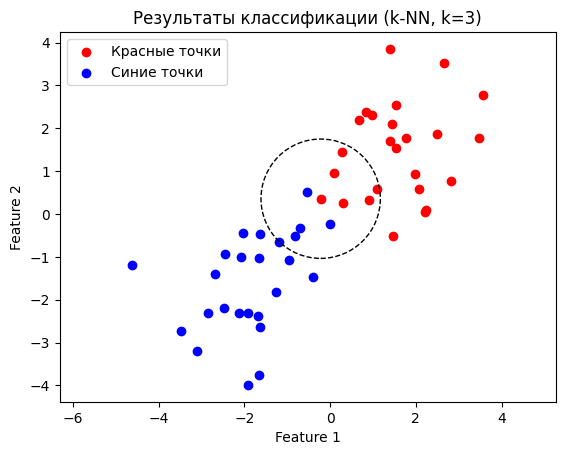

In [4]:
# Визуализируем результаты
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Красные точки')
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Синие точки')
for i, point in enumerate(black_points):
    plt.scatter(point[0], point[1], color='red' if y_pred[i] == 1 else 'blue')

#Для одной из черных точек отобразим окружность радиусом от нее до k-го ближайшего соседа
point = black_points[0]
distances = np.linalg.norm(X_train - point, axis=1)
k_nearest = np.argsort(distances)[:k]
radius = distances[k_nearest[-1]]
plt.gca().add_patch(Circle(point, radius, color='black', fill=False, linestyle='--'))

# Соотношение сторон графика один к одному
plt.axis('equal')

plt.legend()
plt.title(f'Результаты классификации (k-NN, k={k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

___
Похожим образом мы можем предсказывать численные признаки с помощью kNN. Для этого будем брать среднее значение целевого признака и k ближайших к неизвестному объекту соседей.

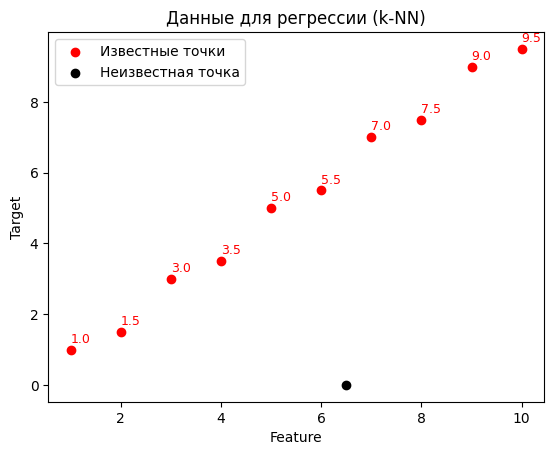

In [5]:
# Создаем данные
np.random.seed(42)
X_train = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y_train = np.array([1, 1.5, 3, 3.5, 5, 5.5, 7, 7.5, 9, 9.5])

# Точка, для которой будем делать предсказание
X_test = np.array([[6.5]])

# Визуализируем данные
plt.scatter(X_train, y_train, color='red', label='Известные точки')
plt.scatter(X_test, [0], color='black', label='Неизвестная точка', zorder=5)
for i in range(len(X_train)):
    plt.text(X_train[i], y_train[i] + 0.2, str(y_train[i]), color='red', fontsize=9)
plt.title('Данные для регрессии (k-NN)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [6]:
from sklearn.neighbors import KNeighborsRegressor

# Создаем и обучаем модель k-NN для регрессии
k = 4
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)

# Предсказываем значение для неизвестной точки
y_pred = knn_reg.predict(X_test)


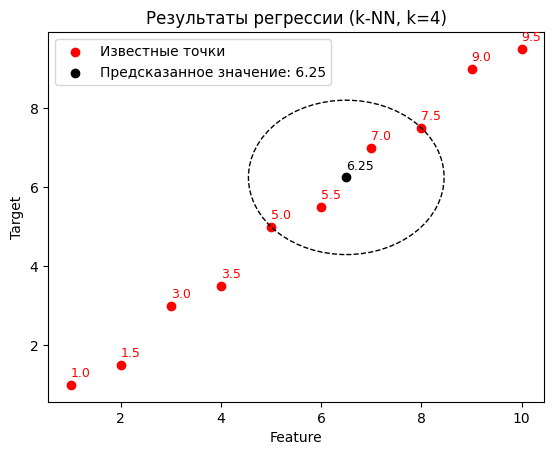

Предсказанное значение для точки 6.5: 6.25


In [7]:
# Визуализируем результаты
plt.scatter(X_train, y_train, color='red', label='Известные точки')
plt.scatter(X_test, y_pred, color='black', label=f'Предсказанное значение: {y_pred[0]:.2f}', zorder=5)
for i in range(len(X_train)):
    plt.text(X_train[i], y_train[i] + 0.2, str(y_train[i]), color='red', fontsize=9)
plt.text(X_test[0], y_pred + 0.2, f'{y_pred[0]:.2f}', color='black', fontsize=9)

#Окружность радиусом от нее до k-го ближайшего соседа
point = (X_test[0][0], y_pred[0])
points = np.array(list(zip(X_train.flatten(), y_train)))
distances = np.linalg.norm(points - point, axis=1)
k_nearest = np.argsort(distances)[:k]
radius = distances[k_nearest[-1]]
plt.gca().add_patch(Circle(point, radius, color='black', fill=False, linestyle='--'))

plt.title(f'Результаты регрессии (k-NN, k={k})')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Печатаем предсказанное значение
print(f'Предсказанное значение для точки {X_test[0][0]}: {y_pred[0]:.2f}')

___
#### Линейная регрессия

**Алгоритм:** 
Линейная регрессия - это один из самых простых и широко используемых методов машинного обучения для прогнозирования непрерывных значений. Она основана на предположении, что существует линейная зависимость между входными переменными (признаками) и выходной переменной (целевой переменной). Модель линейной регрессии пытается найти оптимальную прямую линию, которая минимизирует сумму квадратов ошибок (разницы между реальными и предсказанными значениями).

**Интуиция:**
Интуитивно линейная регрессия работает следующим образом: представьте, что у вас есть набор данных, который состоит из точек на плоскости. Если эти точки распределены так, что можно провести прямую линию, которая примерно проходит через центр этих точек, то можно использовать эту линию для предсказания значений в будущем. Эта линия называется "линия наименьших квадратов" или "линейная регрессия".

**Базовая формула:**

Линейная регрессия описывается уравнением прямой линии:

$y=b​ + k * ​x$

где:

y - предсказанное значение (целевой переменной),

x - значение независимой переменной (признака),

b​ - свободный член (пересечение с осью Y),

k​ - коэффициент (угол наклона линии).

**Общая формула:**

$y=b_0​+b_1*​x_1​+b_2*​x_2​+...+b_n*​x_n​$

где:

y - предсказанное значение (зависимая переменная),

$x_1,x_2,...,x_n$ - независимые признаки,

$b_1,b_2,...,b_n$ - коэффиценты зависимости,

$b_0$ - свободный член.


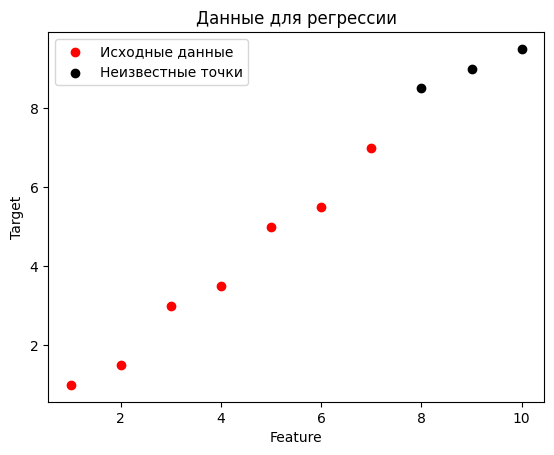

In [8]:
# Создаем данные
np.random.seed(42)
X = np.array([[1], [2], [3], [4], [5], [6], [7]])
y = np.array([1, 1.5, 3, 3.5, 5, 5.5, 7])

#Неизвестные точки
X_test = np.array([[8], [9], [10]])
y_test = np.array([8.5, 9, 9.5])


# Визуализируем данные
plt.scatter(X, y, color='red', label='Исходные данные')
plt.scatter(X_test, y_test, color='black', label='Неизвестные точки')
plt.title('Данные для регрессии')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

# Создаем и обучаем модель линейной регрессии
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Предсказываем значения для точек X и X_test
y_pred = lin_reg.predict(np.vstack((X, X_test)))


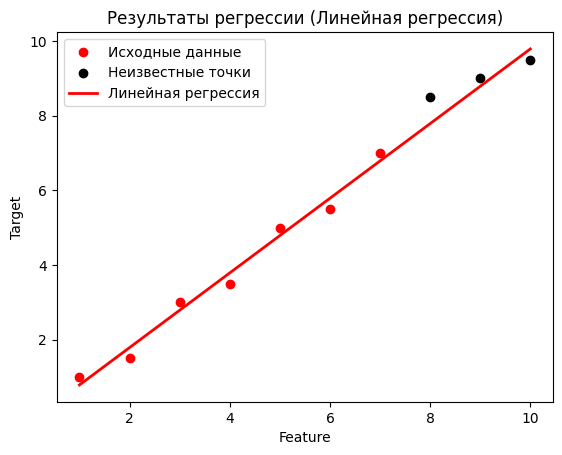

Коэффициент (угол наклона): 1.00
Свободный член (пересечение с осью Y): -0.21


In [10]:
# Визуализируем результаты
plt.scatter(X, y, color='red', label='Исходные данные')
plt.scatter(X_test, y_test, color='black', label='Неизвестные точки')
plt.plot(np.vstack((X, X_test)), y_pred, color='red', linewidth=2, label='Линейная регрессия')
plt.title('Результаты регрессии (Линейная регрессия)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# Печатаем коэффициенты модели
print(f'Коэффициент (угол наклона): {lin_reg.coef_[0]:.2f}')
print(f'Свободный член (пересечение с осью Y): {lin_reg.intercept_:.2f}')

___
#### Логистическая регрессия

**Алгоритм:** Логистическая регрессия — это метод машинного обучения, используемый для бинарной классификации. В отличие от линейной регрессии, которая предсказывает непрерывные значения, логистическая регрессия предсказывает вероятность принадлежности объекта к определённому классу. Она применяется, когда целевая переменная имеет два возможных значения (например, "да" или "нет", "болен" или "здоров").

**Интуиция:** Логистическая регрессия работает следующим образом: она моделирует вероятность того, что объект принадлежит к одному из двух классов, используя сигмоидальную функцию (логистическую функцию). Сигмоидальная функция преобразует линейное сочетание признаков в вероятность, которая варьируется между 0 и 1. Если эта вероятность больше порогового значения (обычно 0.5), объект классифицируется как принадлежащий к одному классу, иначе - к другому.

**Базовые формулы и отличие от линейной регрессии**

Вспомним формулу линейной регресии:

$y=b_0​+b_1*​x_1​+b_2*​x_2​+...+b_n*​x_n​$

Логистическая регрессия использует логистическую функцию для преобразования линейной комбинации признаков в вероятность:

$p(z) = \frac{1}{1+e^{-z}}$ (сигмоида)

где:

p - вероятность принадлежности к положительному классу,

e - основание натурального логарифма,

z - линейное сочетание признаков, вычисляемое как $z=b_0​+b_1*​x_1​+b_2*​x_2​+...+b_n*​x_n​$


В итоге после применения модели мы получаем вероятность того что объект относится к положительному классу. Мы можем сделать вывод о принадлежности к положительному классу если наша вероятность больше какого-то порога (стандартный порог = 0.5). Так, например, если мы получили p(z) = 0.9, то объект с высокой вероятностью относится к положительному классу.

**Отличие от линейной регрессии:**

1. Целевая переменная: В линейной регрессии целевая переменная y является непрерывной. В логистической регрессии целевая переменная y является категориальной (бинарной), и модель предсказывает вероятность принадлежности к одному из двух классов.

2. Функция активации: Линейная регрессия использует линейную функцию (прямая линия) для предсказания значений. Логистическая регрессия использует логистическую функцию (сигмоид), которая ограничивает предсказания в диапазоне от 0 до 1, что делает её подходящей для задач классификации.

**Пример работы логистической регрессии**

Рассмотрим пример, где мы будем использовать логистическую регрессию для классификации точек на графике. Мы создадим два класса точек и будем использовать логистическую регрессию для предсказания класса новых точек.

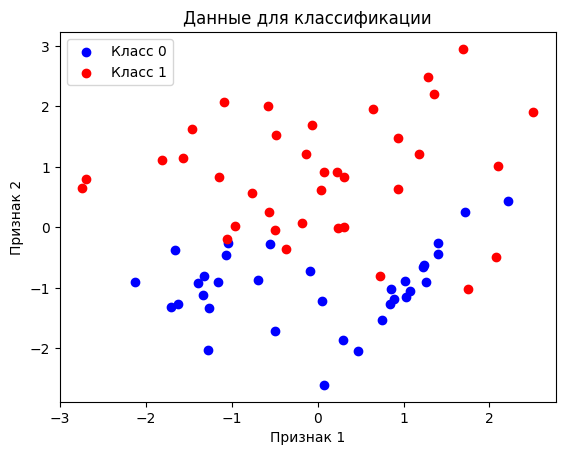

In [11]:
from sklearn.datasets import make_classification

# Создаем данные для классификации
X, y = make_classification(n_samples=70, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Разделяем данные на обучающую и тестовую выборки

# Визуализируем данные
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Класс 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Класс 1')
plt.title('Данные для классификации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

In [12]:
# Импортируем необходимые библиотеки
from sklearn.linear_model import LogisticRegression

# Создаем и обучаем модель логистической регрессии
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Предсказываем значения для тестовой выборки
y_pred = log_reg.predict(X)


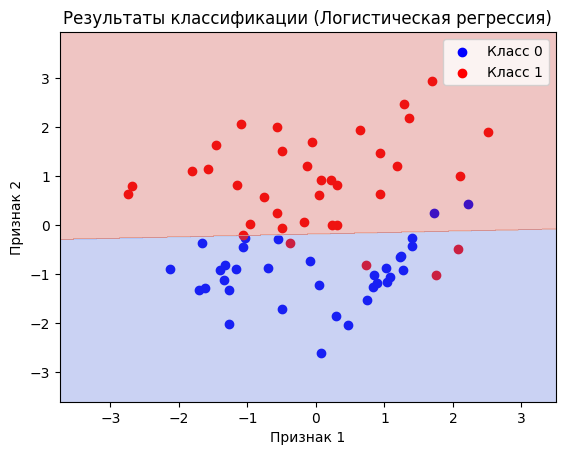

In [13]:
# Визуализируем результаты
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Класс 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Класс 1')

# Добавляем границу принятия решения
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Результаты классификации (Логистическая регрессия)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

___
Теперь мы представляем как примерно устроены линейные модели. Возможно у вас возник вопрос: если значения $x_i$ мы берем из данных, то как найти нужные нам значения $b_i$ (их обычно называют весами модели)? На самом деле этот вопрос сложнее чем кажется. 

Можно попробовать просто перебирать значения, но такой подход очень неэффективен и займет очень много времени на хоть сколько-нибудь больших моделях. В реальности для того чтобы это сделать используются разнообразные методы оптимизации, которые вы изучите в вузе. А пока просто поверьте что есть умный способ чтобы это сделать.